# Visualisation des données de Rayonnement CERES en surface et au sommet de l atmosphère (TOA)

#### Extraction des fichiers netCDF et Visualisation sur la période 2007-2016 en moyenne climatologique annuelle et par saisons

In [1]:
import os

import netCDF4 as nc

import numpy as np
import numpy.ma as ma

import matplotlib.pyplot as plt
from matplotlib import cm

import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from myfunctions import *

In [2]:
######### EXTRACTION DES DONNEES DE RAYONNEMENT EN SURFACE CERES ##########


# Where to save images
rep0 = './quicklooks/'
# If the directory does not exist, we create it
if not(os.path.exists(rep0)):
    os.makedirs(rep0)

# Projection for plotting
proj = ccrs.LambertConformal(central_latitude = 37,
                             central_longitude = 10,
                             standard_parallels = (37, 37)
                             )
var0= 'rsut'
var1 = 'rsus'
var2 = 'rsuscs'
var3 = 'rlus'
var4 = 'rluscs'
var5 = 'rsds'
var6 = 'rsdscs_c'
var7 = 'rlds'
var8 = 'rldscs'

# file to open
#fin = '{0}_MED-44_ECMWF-ERAINT_evaluation_r1i1p1f2_CNRM-ALADIN64_v1_mon_200701-200701.nc'.format(var)

fin1 = '{0}_CERES_EBAF_Ed4-1_200003-201901_regrid_ALADIN_bilinear.nc'.format(var1)   
fin2 = '{0}_CERES_EBAF_Ed4-1_200003-201901_regrid_ALADIN_bilinear.nc'.format(var2)
fin3 = '{0}_CERES_EBAF_Ed4-1_200003-201901_regrid_ALADIN_bilinear.nc'.format(var3)
fin4 = '{0}_CERES_EBAF_Ed4-1_200003-201901_regrid_ALADIN_bilinear.nc'.format(var3)
fin5 = '{0}_CERES_EBAF_Ed4-1_200003-201901_regrid_ALADIN_bilinear.nc'.format(var5)   
fin6 = '{0}_CERES_EBAF_Ed4-1_200003-201901_regrid_ALADIN_bilinear.nc'.format(var6)
fin7 = '{0}_CERES_EBAF_Ed4-1_200003-201901_regrid_ALADIN_bilinear.nc'.format(var7)
fin8 = '{0}_CERES_EBAF_Ed4-1_200003-201901_regrid_ALADIN_bilinear.nc'.format(var8)

# Open file as a dataset
a = nc.Dataset(fin1)
b = nc.Dataset(fin2)
c = nc.Dataset(fin3)
d = nc.Dataset(fin4)
e = nc.Dataset(fin5)
f = nc.Dataset(fin6)
g = nc.Dataset(fin7)
h = nc.Dataset(fin8)

# Read data, latitude, longitude, time
data1 = a[var0][:,:,:]
data2 = b[var0][:,:,:]
data3 = c[var0][:,:,:]
data4 = d[var0][:,:,:]
data5 = e[var0][:,:,:]
data6 = f[var0][:,:,:]
data7 = g[var0][:,:,:]
data8 = h[var0][:,:,:]


lat = d['lat'][:,:]
lon = d['lon'][:,:]
time = d['time'][:]


print(var1,ma.min(data1),ma.max(data1))
print(var2,ma.min(data2),ma.max(data2))
print(var3,ma.min(data3),ma.max(data3))
print(var4,ma.min(data4),ma.max(data4))
print(var5,ma.min(data5),ma.max(data5))
print(var6,ma.min(data6),ma.max(data6))
print(var7,ma.min(data7),ma.max(data7))
print(var8,ma.min(data8),ma.max(data8))

a.close()
b.close()
c.close()
d.close()
e.close()
f.close()
g.close()
h.close()

rsus 0.39659768 192.43648
rsuscs 0.014990024 218.5905
rlus 216.07787 572.9766
rluscs 216.07787 572.9766
rsds 5.480467 375.7046
rsdscs_c 12.859661 392.3647
rlds 179.43533 475.01486
rldscs 151.69229 454.89377


In [3]:
### RSDT calcul ###

data_rsdt = np.zeros((120,101,153))
data_rsdt[:] = np.nan

r_max = np.zeros((365,101,153))
r_max[:] = np.nan

r_moy_day = np.zeros((365,101,153))
r_moy_day[:] = np.nan

declinaison = np.zeros((365,101,153))
declinaison[:] = np.nan
D = np.zeros((365,101,153))

for d in range(365):
    declinaison[d,:,:] = -0.409*np.sin((d-80)/58.12)
    r_max[d,:,:] = 1360*np.cos(declinaison[d,:,:]+lat/57.3)
    D[d,:,:] = np.arccos(np.tan(lat/57.3)*np.tan(-0.409*np.sin((d-80)/58.12)))/7.5*57.3

r_moy_day = 1/12 * (-4*r_max/(3*D**2)*(D/2)**3 + r_max*D/2)

ind = [0,31,59,90,120,151,181,212,243,273,304,334,365]

for j in range(10):
    for i in range(12):
        data_rsdt[(j*12+i),:,:] = np.nanmean(r_moy_day[ind[i]:ind[i+1],:,:],axis=0)


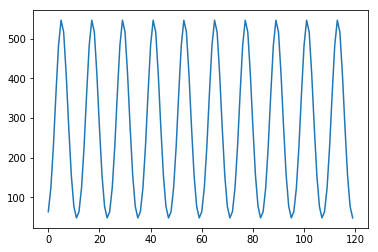

In [4]:
plt.plot(data_rsdt[:,95,55])

In [5]:
######### EXTRACTION DES DONNEES DE RAYONNEMENT TOA CERES ##########


# Where to save images
rep0 = './quicklooks/'
# If the directory does not exist, we create it
if not(os.path.exists(rep0)):
    os.makedirs(rep0)

# Projection for plotting
proj = ccrs.LambertConformal(central_latitude = 37,
                             central_longitude = 10,
                             standard_parallels = (37, 37)
                             )
var0= 'rsut'
var9 = 'rsut'
var10 = 'rsutcs'
var11 = 'rlut'
var12 = 'rlutcs'

# file to open
#fin = '{0}_MED-44_ECMWF-ERAINT_evaluation_r1i1p1f2_CNRM-ALADIN64_v1_mon_200701-200701.nc'.format(var)

fin9 = '{0}_CERES_EBAF_Ed4-1_200003-201901_regrid_ALADIN_bilinear.nc'.format(var9)   
fin10 = '{0}_CERES_EBAF_Ed4-1_200003-201901_regrid_ALADIN_bilinear.nc'.format(var10)
fin11 = '{0}_CERES_EBAF_Ed4-1_200003-201901_regrid_ALADIN_bilinear.nc'.format(var11)
fin12 = '{0}_CERES_EBAF_Ed4-1_200003-201901_regrid_ALADIN_bilinear.nc'.format(var12)


# Open file as a dataset
i = nc.Dataset(fin9)
j = nc.Dataset(fin10)
k = nc.Dataset(fin11)
l = nc.Dataset(fin12)


# Read data, latitude, longitude, time
data9 = i[var0][:,:,:]
data10 = j[var0][:,:,:]
data11 = k[var0][:,:,:]
data12 = l[var0][:,:,:]




print(var9,ma.min(data9),ma.max(data9))
print(var10,ma.min(data10),ma.max(data10))
print(var11,ma.min(data11),ma.max(data11))
print(var12,ma.min(data12),ma.max(data12))


i.close()
j.close()
k.close()
l.close()

print(data1[82:202].shape)


Data = np.zeros((13,120,101,153))
Data[:] = np.nan

data = [data1[82:202],data2[82:202],data3[82:202],data4[82:202],\
        data5[82:202],data6[82:202],data7[82:202],data8[82:202],\
        data9[82:202],data10[82:202],data11[82:202],data12[82:202],data_rsdt]

for i in range(13):
    Data[i,:,:,:] = data[i]

print(Data.shape)


rsut 14.387914 231.75604
rsutcs 6.5967317 243.25969
rlut 179.81651 346.27103
rlutcs 176.73332 355.63705
(120, 101, 153)
(13, 120, 101, 153)


In [6]:
########## MOYENNES TEMPORELLES ###########

### Par saison ###

#On calcule pour chaque annee la moyenne de chaque saison

data_season1 = np.zeros((4,10,101,153))
data_season1[:] = np.nan
data_season2 = np.zeros((4,10,101,153))
data_season2[:] = np.nan
data_season3 = np.zeros((4,10,101,153))
data_season3[:] = np.nan
data_season4 = np.zeros((4,10,101,153))
data_season4[:] = np.nan
data_season5 = np.zeros((4,10,101,153))
data_season5[:] = np.nan
data_season6 = np.zeros((4,10,101,153))
data_season6[:] = np.nan
data_season7 = np.zeros((4,10,101,153))
data_season7[:] = np.nan
data_season8 = np.zeros((4,10,101,153))
data_season8[:] = np.nan
data_season9 = np.zeros((4,10,101,153))
data_season9[:] = np.nan
data_season10 = np.zeros((4,10,101,153))
data_season10[:] = np.nan
data_season11 = np.zeros((4,10,101,153))
data_season11[:] = np.nan
data_season12 = np.zeros((4,10,101,153))
data_season12[:] = np.nan
data_season13 = np.zeros((4,10,101,153))
data_season13[:] = np.nan

for i in range(10):
    data_season1[0,i,:,:] = np.nanmean(data1[(81+12*i):(84+12*i),:,:],axis=0)
    data_season1[1,i,:,:] = np.nanmean(data1[(84+12*i):(87+12*i),:,:],axis=0)
    data_season1[2,i,:,:] = np.nanmean(data1[(87+12*i):(90+12*i),:,:],axis=0)
    data_season1[3,i,:,:] = np.nanmean(data1[(90+12*i):(93+12*i),:,:],axis=0)
    
    data_season2[0,i,:,:] = np.nanmean(data2[(81+12*i):(84+12*i),:,:],axis=0)
    data_season2[1,i,:,:] = np.nanmean(data2[(84+12*i):(87+12*i),:,:],axis=0)
    data_season2[2,i,:,:] = np.nanmean(data2[(87+12*i):(90+12*i),:,:],axis=0)
    data_season2[3,i,:,:] = np.nanmean(data2[(90+12*i):(93+12*i),:,:],axis=0)
    
    data_season3[0,i,:,:] = np.nanmean(data3[(81+12*i):(84+12*i),:,:],axis=0)
    data_season3[1,i,:,:] = np.nanmean(data3[(84+12*i):(87+12*i),:,:],axis=0)
    data_season3[2,i,:,:] = np.nanmean(data3[(87+12*i):(90+12*i),:,:],axis=0)
    data_season3[3,i,:,:] = np.nanmean(data3[(90+12*i):(93+12*i),:,:],axis=0)	
    
    data_season4[0,i,:,:] = np.nanmean(data4[(81+12*i):(84+12*i),:,:],axis=0)
    data_season4[1,i,:,:] = np.nanmean(data4[(84+12*i):(87+12*i),:,:],axis=0)
    data_season4[2,i,:,:] = np.nanmean(data4[(87+12*i):(90+12*i),:,:],axis=0)
    data_season4[3,i,:,:] = np.nanmean(data4[(90+12*i):(93+12*i),:,:],axis=0)

    data_season5[0,i,:,:] = np.nanmean(data5[(81+12*i):(84+12*i),:,:],axis=0)
    data_season5[1,i,:,:] = np.nanmean(data5[(84+12*i):(87+12*i),:,:],axis=0)
    data_season5[2,i,:,:] = np.nanmean(data5[(87+12*i):(90+12*i),:,:],axis=0)
    data_season5[3,i,:,:] = np.nanmean(data5[(90+12*i):(93+12*i),:,:],axis=0)
    
    data_season6[0,i,:,:] = np.nanmean(data6[(81+12*i):(84+12*i),:,:],axis=0)
    data_season6[1,i,:,:] = np.nanmean(data6[(84+12*i):(87+12*i),:,:],axis=0)
    data_season6[2,i,:,:] = np.nanmean(data6[(87+12*i):(90+12*i),:,:],axis=0)
    data_season6[3,i,:,:] = np.nanmean(data6[(90+12*i):(93+12*i),:,:],axis=0)
    

    data_season7[0,i,:,:] = np.nanmean(data7[(81+12*i):(84+12*i),:,:],axis=0)
    data_season7[1,i,:,:] = np.nanmean(data7[(84+12*i):(87+12*i),:,:],axis=0)
    data_season7[2,i,:,:] = np.nanmean(data7[(87+12*i):(90+12*i),:,:],axis=0)
    data_season7[3,i,:,:] = np.nanmean(data7[(90+12*i):(93+12*i),:,:],axis=0)	
    
    data_season8[0,i,:,:] = np.nanmean(data8[(81+12*i):(84+12*i),:,:],axis=0)
    data_season8[1,i,:,:] = np.nanmean(data8[(84+12*i):(87+12*i),:,:],axis=0)
    data_season8[2,i,:,:] = np.nanmean(data8[(87+12*i):(90+12*i),:,:],axis=0)
    data_season8[3,i,:,:] = np.nanmean(data8[(90+12*i):(93+12*i),:,:],axis=0)
    
    data_season9[0,i,:,:] = np.nanmean(data9[(81+12*i):(84+12*i),:,:],axis=0)
    data_season9[1,i,:,:] = np.nanmean(data9[(84+12*i):(87+12*i),:,:],axis=0)
    data_season9[2,i,:,:] = np.nanmean(data9[(87+12*i):(90+12*i),:,:],axis=0)
    data_season9[3,i,:,:] = np.nanmean(data9[(90+12*i):(93+12*i),:,:],axis=0)
    
    data_season10[0,i,:,:] = np.nanmean(data10[(81+12*i):(84+12*i),:,:],axis=0)
    data_season10[1,i,:,:] = np.nanmean(data10[(84+12*i):(87+12*i),:,:],axis=0)
    data_season10[2,i,:,:] = np.nanmean(data10[(87+12*i):(90+12*i),:,:],axis=0)
    data_season10[3,i,:,:] = np.nanmean(data10[(90+12*i):(93+12*i),:,:],axis=0)
    
    data_season11[0,i,:,:] = np.nanmean(data11[(81+12*i):(84+12*i),:,:],axis=0)
    data_season11[1,i,:,:] = np.nanmean(data11[(84+12*i):(87+12*i),:,:],axis=0)
    data_season11[2,i,:,:] = np.nanmean(data11[(87+12*i):(90+12*i),:,:],axis=0)
    data_season11[3,i,:,:] = np.nanmean(data11[(90+12*i):(93+12*i),:,:],axis=0)    
    
    data_season12[0,i,:,:] = np.nanmean(data12[(81+12*i):(84+12*i),:,:],axis=0)
    data_season12[1,i,:,:] = np.nanmean(data12[(84+12*i):(87+12*i),:,:],axis=0)
    data_season12[2,i,:,:] = np.nanmean(data12[(87+12*i):(90+12*i),:,:],axis=0)
    data_season12[3,i,:,:] = np.nanmean(data12[(90+12*i):(93+12*i),:,:],axis=0)
    
    data_season13[0,i,:,:] = np.nanmean(data_rsdt[11:14,:,:],axis=0)
    data_season13[1,i,:,:] = np.nanmean(data_rsdt[2:5,:,:],axis=0)
    data_season13[2,i,:,:] = np.nanmean(data_rsdt[5:8,:,:],axis=0)
    data_season13[3,i,:,:] = np.nanmean(data_rsdt[8:11,:,:],axis=0)
    
# On fait la moyenne sur les 10 annees

data_moy1 = np.nanmean(data_season1,axis=1)
data_moy2 = np.nanmean(data_season2,axis=1)
data_moy3 = np.nanmean(data_season3,axis=1)
data_moy4 = np.nanmean(data_season4,axis=1)
data_moy5 = np.nanmean(data_season5,axis=1)
data_moy6 = np.nanmean(data_season6,axis=1)
data_moy7 = np.nanmean(data_season7,axis=1)
data_moy8 = np.nanmean(data_season8,axis=1)
data_moy9 = np.nanmean(data_season9,axis=1)
data_moy10 = np.nanmean(data_season10,axis=1)
data_moy11 = np.nanmean(data_season11,axis=1)
data_moy12 = np.nanmean(data_season12,axis=1)
data_moy13 = np.nanmean(data_season13,axis=1)

# On calcule les differents CRE

diff_sw_moy = data_moy5 - data_moy1 - data_moy6 + data_moy2
diff_lw_moy = data_moy7 - data_moy8 
diff_tot_moy = diff_lw_moy + diff_sw_moy
diff_sw_moy_toa = data_moy10 - data_moy9
diff_lw_moy_toa = data_moy12 - data_moy11
diff_tot_moy_toa = diff_lw_moy_toa + diff_sw_moy_toa

#optionel
data_net = data_moy5 + data_moy7 - data_moy1 - data_moy3
Tb = (data_moy3 / 5.67e-8)**0.25 -273.15

# albedo 

In [7]:
##### Calcul des CRE mensuels #####

Data_mois = np.zeros((13,12,10,101,153))
Data_mois[:] = np.nan
CRE_mois = np.zeros((12,101,153,11))
CRE_mois[:] = np.nan

for i in range(10):
    for j in range(12):
        for k in range(12):
            Data_mois[k,j,i,:,:] = Data[k,(j+12*i),:,:]
    Data_mois[12,:,i,:,:] = data_rsdt[0:12,:,:]
        
Data_mois_moy = np.nanmean(Data_mois,axis=2)

CRE_mois[:,:,:,0] = Data_mois_moy[4] - Data_mois_moy[0] - Data_mois_moy[5] + Data_mois_moy[1]
CRE_mois[:,:,:,1] = Data_mois_moy[6] - Data_mois_moy[7]
CRE_mois[:,:,:,2] = CRE_mois[:,:,:,0] + CRE_mois[:,:,:,1]
CRE_mois[:,:,:,3] = Data_mois_moy[9] - Data_mois_moy[8]
CRE_mois[:,:,:,4] = Data_mois_moy[11] - Data_mois_moy[10]
CRE_mois[:,:,:,5] = CRE_mois[:,:,:,3] + CRE_mois[:,:,:,4]
CRE_mois[:,:,:,6] = CRE_mois[:,:,:,0] / (Data_mois_moy[5]-Data_mois_moy[1])
CRE_mois[:,:,:,7] = CRE_mois[:,:,:,3] / (Data_mois_moy[5]-Data_mois_moy[1])
CRE_mois[:,:,:,8] = CRE_mois[:,:,:,3] / (Data_mois_moy[12]-Data_mois_moy[9])
CRE_mois[:,:,:,9] = Data_mois_moy[12]-Data_mois_moy[9]
CRE_mois[:,:,:,10] = Data_mois_moy[5]-Data_mois_moy[1]


In [27]:
##### determination de boites #####

nt,nlat,nlon = data1.shape

    
lat_min = 50
lat_max = 55
lon_min = 20
lon_max = 30

# find coords of nearest point in grid from point (TARGET_LAT, TARGET_LON)
    
target_x = []
target_y = []
 
for x in range(nlon):
    for y in range(nlat):
        if lat[y,x]>=lat_min and lat[y,x]<=lat_max and lon[y,x]>=lon_min and lon[y,x]<=lon_max:
            target_x.append(x)
            target_y.append(y)
                 

# Temporal mean - box

data_boite=np.zeros((12,len(target_x),11))
data_boite_moy=np.zeros((12,len(target_x),11))
  
for j in range(12):
    for k in range(len(target_x)):
        data_boite[j,k,:] =  CRE_mois[j,target_y[k],target_x[k],:] 
        
        
data_boite_moy = np.nanmean(data_boite,axis=1)


print(data_boite_moy)


[[-2.11195691e+01  5.18500222e+01  3.07304531e+01 -1.77485793e+01
   2.56141361e+01  7.86555672e+00 -5.38105105e-01 -4.51716725e-01
  -3.20520177e-01  5.51121346e+01  3.91139918e+01]
 [-3.31141790e+01  4.87417821e+01  1.56276031e+01 -2.85476187e+01
   2.36974548e+01 -4.85016396e+00 -4.70954936e-01 -4.06515134e-01
  -2.92120759e-01  9.76995863e+01  7.00980915e+01]
 [-5.22075620e+01  4.24323661e+01 -9.77519588e+00 -4.46502837e+01
   2.10123085e+01 -2.36379752e+01 -3.78156001e-01 -3.23314800e-01
  -2.34353382e-01  1.90415187e+02  1.38005108e+02]
 [-6.50376987e+01  3.21640439e+01 -3.28736548e+01 -5.65429908e+01
   2.03137377e+01 -3.62292532e+01 -3.06173383e-01 -2.66289371e-01
  -1.83827637e-01  3.07380669e+02  2.12179265e+02]
 [-7.63401475e+01  2.83785100e+01 -4.79616376e+01 -6.83208355e+01
   2.37660844e+01 -4.45547511e+01 -2.95601270e-01 -2.64574792e-01
  -1.69689759e-01  4.02627073e+02  2.58287928e+02]
 [-7.85001961e+01  2.42758671e+01 -5.42243290e+01 -6.99539777e+01
   2.24846523e+01 -

Text(0.5,1,'CRE (W/m^2) in Eastern europe (20E,50N / 30E,55N) - 2007 to 2016')

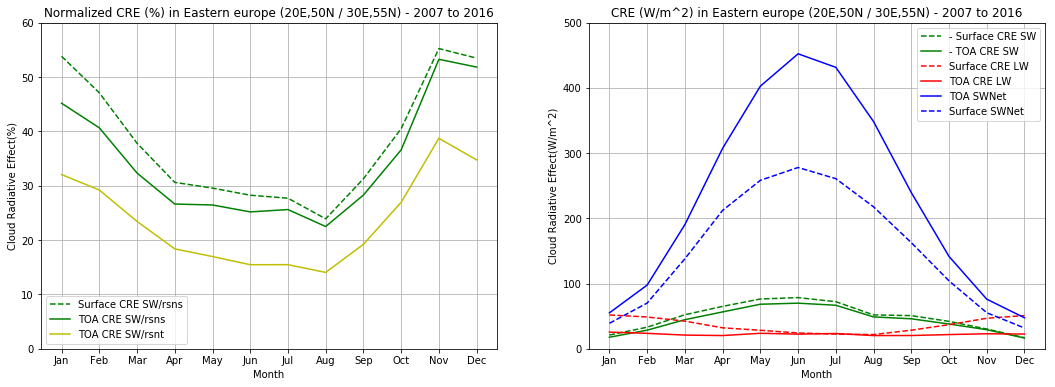

In [28]:
########## PLOT ###########

#Western Mediterranean (3E,37N / 8.5E,42.5N)
#Eastern Mediterranean (15E,33N / 22E,37N)
#Western Sahara (-6W,20N / 4E,27N)
#Eastern Sahara (24E,19N / 30E,25N)
#North Atlantic (-30W,45N / -21,55N)
#Eastern europe (20E,50N / 30E,55N)

'''
fig=plt.figure(figsize=(12,8))
plt.plot(data_month_moy[:,58,63,0],label='Cll',color='r')
plt.plot(data_month_moy[:,58,63,1],label='Clm',color='m')
plt.plot(data_month_moy[:,58,63,2],label='Clh',color='g')
plt.plot(data_month_moy[:,58,63,3],label='Clt',color='k')
plt.legend()

print('lon=',lon[58,62])
print('lat=',lat[58,62])
'''
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig=plt.figure(figsize=(18,6))

'''
plt.plot(months,data_boite_moy[:,0],'g--',label='Surface CRE SW')
plt.plot(months,data_boite_moy[:,1],'r--',label='Surface CRE LW')
plt.plot(months,data_boite_moy[:,2],'k--',label='Surface CRE Net')
plt.plot(months,data_boite_moy[:,3],label='TOA CRE SW',color='g')
plt.plot(months,data_boite_moy[:,4],label='TOA CRE LW',color='r')
plt.plot(months,data_boite_moy[:,5],label='TOA CRE Net',color='k')
'''
plt.subplot(121)
plt.plot(months,-data_boite_moy[:,6]*100,'g--',label='Surface CRE SW/rsns')
plt.plot(months,-data_boite_moy[:,7]*100,label='TOA CRE SW/rsns',color='g')
plt.plot(months,-data_boite_moy[:,8]*100,label='TOA CRE SW/rsnt',color='y')
plt.legend()
plt.ylim(0,60)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Cloud Radiative Effect(%)')
plt.title('Normalized CRE (%) in Eastern europe (20E,50N / 30E,55N) - 2007 to 2016')

plt.subplot(122)
plt.plot(months,-data_boite_moy[:,0],'g--',label='- Surface CRE SW')
plt.plot(months,-data_boite_moy[:,3],label='- TOA CRE SW',color='g')
plt.plot(months,data_boite_moy[:,1],'r--',label='Surface CRE LW')
plt.plot(months,data_boite_moy[:,4],label='TOA CRE LW',color='r')
plt.plot(months,data_boite_moy[:,9],label='TOA SWNet',color='b')
plt.plot(months,data_boite_moy[:,10],'b--',label='Surface SWNet')
plt.legend()
plt.ylim(0,500)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Cloud Radiative Effect(W/m^2)')
plt.legend()
plt.title('CRE (W/m^2) in Eastern europe (20E,50N / 30E,55N) - 2007 to 2016')


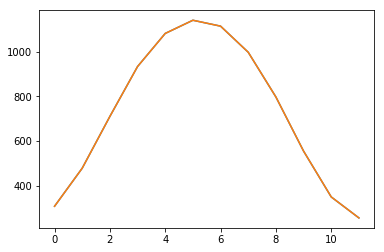

In [39]:
plt.plot(Data_mois_moy[12,:,95,55])
plt.plot(data_rsdt[0:12,95,55])

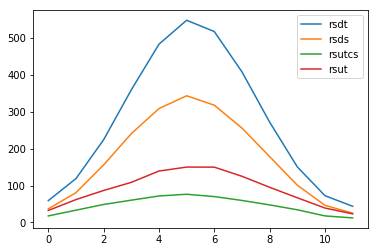

In [29]:
plt.plot(Data_mois_moy[12,:,95,75],label='rsdt')
plt.plot(Data_mois_moy[5,:,95,75],label='rsds')
plt.plot(Data_mois_moy[9,:,95,75],label='rsutcs')
plt.plot(Data_mois_moy[8,:,95,75],label='rsut')
plt.legend()

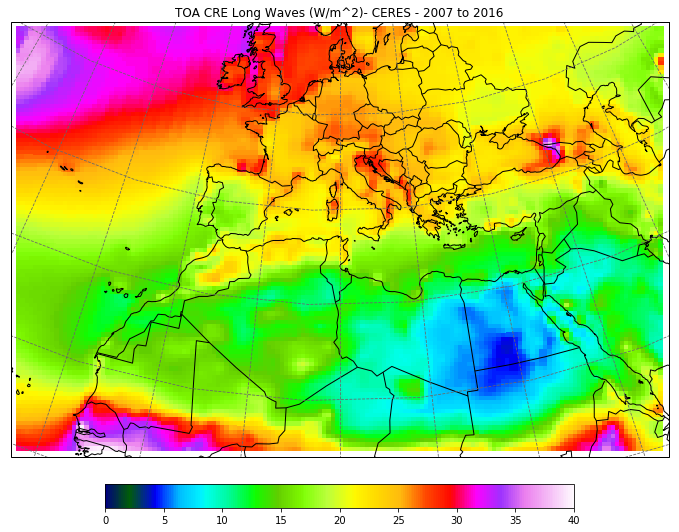

In [19]:
######### PLOTS SUR LA PERIODE COMPLETE ##########

# Domain to be plotted
bbox = [-24,44,14,56]

# Map projection is Lambert Conformal (proj)
fig, ax = plt.subplots(figsize=(12,10),subplot_kw=dict(projection=proj))

# Apply domain to be plotted
ax.set_extent(bbox,crs=ccrs.PlateCarree())
# Add coastlines
ax.coastlines('50m')
# Add country borders
ax.add_feature(cf.BORDERS)

# *must* call draw in order to get the axis boundary used to add ticks
fig.canvas.draw()

xticks = range(-180,181,10)
yticks = range(-90,91,10)
ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--',lw=1,color='dimgrey')

# Label the end-points of the gridlines using the custom tick makers:
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

#lambert_xticks(ax, xticks)
#lambert_yticks(ax, yticks)

#ax.set_title('{0} ({1}) - {2}'.format(name,units,dates[0]))
ax.set_title('TOA CRE Long Waves (W/m^2)- CERES - 2007 to 2016')

# Plot data
cs = ax.pcolormesh(lon,lat,np.nanmean(diff_lw_moy_toa,axis=0), transform=ccrs.PlateCarree(),
        cmap=cm.gist_ncar,vmin=0.,vmax=40.,shading='flat')

# Add colorbar
cbar = fig.colorbar(cs, shrink=0.7, orientation='horizontal',pad=0.05)

# Save in png

a = 'DiffTot_surf'

#plt.savefig('{0}/{1}_obs.png'.format(rep0,a))
plt.show()
plt.close()


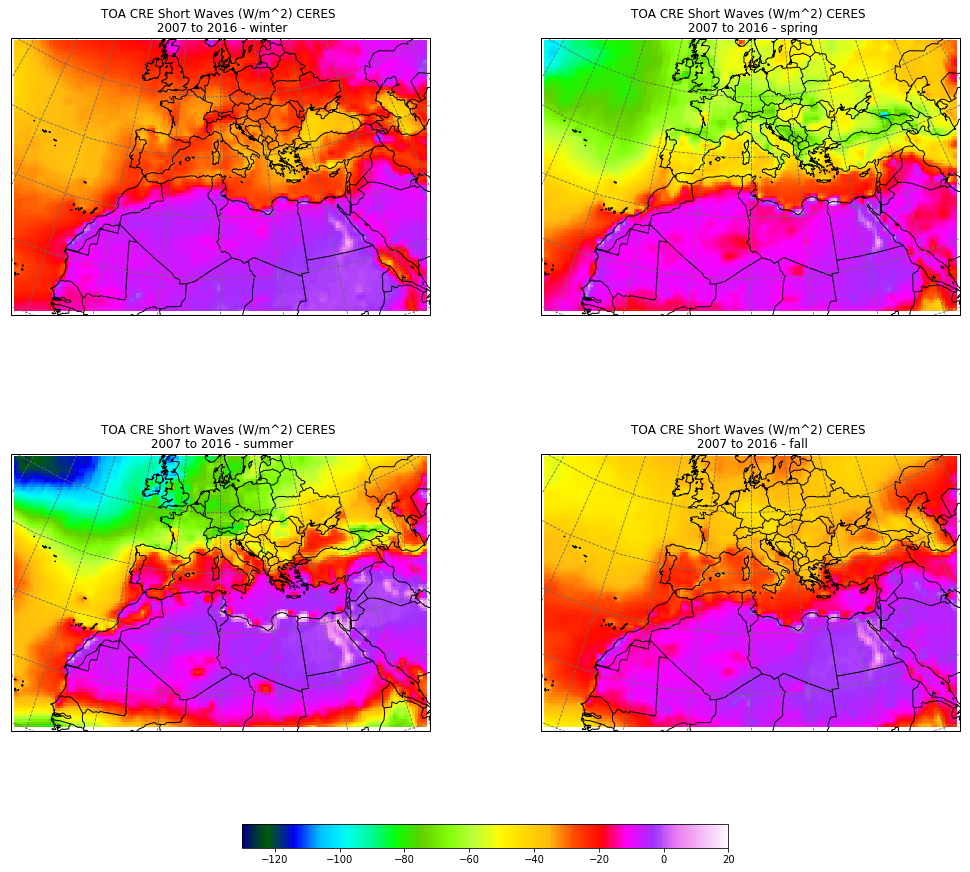

In [56]:
####### SUBPLOTS POUR LES 4 SAISONS #######

# Domain to be plotted
bbox = [-24,44,14,56]

# Map projection is Lambert Conformal (proj)
fig, axes = plt.subplots(2,2,figsize=(20,17),subplot_kw=dict(projection=proj))
title_season = ['winter','spring','summer','fall']

for i, ax in enumerate(axes.flat):
	# Apply domain to be plotted
	ax.set_extent(bbox,crs=ccrs.PlateCarree())
		# Add coastlines
	ax.coastlines('50m')
	
		# Add country borders
	ax.add_feature(cf.BORDERS)
	
		# *must* call draw in order to get the axis boundary used to add ticks
	fig.canvas.draw()
	
	xticks = range(-180,181,10)
	yticks = range(-90,91,10)
	ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--',lw=1,color='dimgrey')
	
    	# Label the end-points of the gridlines using the custom tick makers:
	ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
	ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
	
	#lambert_xticks(ax, xticks)
	#lambert_yticks(ax, yticks)
	
	
	ax.set_title('TOA CRE Short Waves (W/m^2) CERES \n 2007 to 2016 - {0}'.format(title_season[i]))
	
    	# Plot data
	cs = ax.pcolormesh(lon,lat,diff_sw_moy_toa[i,:,:], transform=ccrs.PlateCarree(),
        			cmap=cm.gist_ncar,vmin=-130., vmax=20.,shading='flat')

# Add colorbar
fig.subplots_adjust(right=0.8, hspace=0.5)
cbar = fig.colorbar(cs, ax=axes[:,:], shrink=0.5, orientation='horizontal',pad=0.1)

# Save in png
a='Test'
#plt.savefig('{0}/{1}_season.png'.format(rep0,a))
plt.show()
plt.close()

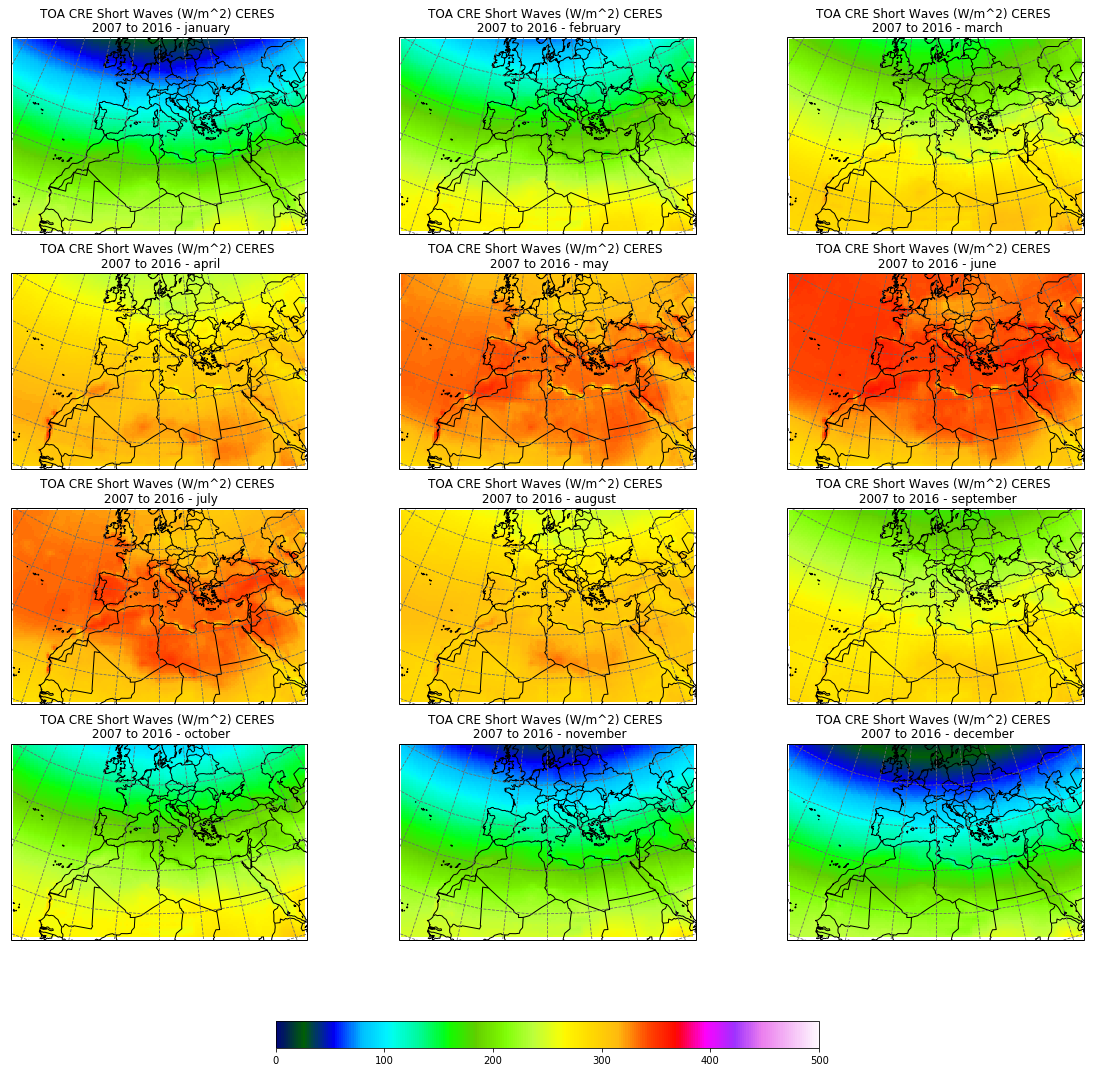

In [8]:
####### SUBPLOTS POUR LES 12 MOIS #######

# Domain to be plotted
bbox = [-24,44,14,56]

# Map projection is Lambert Conformal (proj)
fig, axes = plt.subplots(4,3,figsize=(20,17),subplot_kw=dict(projection=proj))
title_month = ['january','february','march','april','may','june','july','august','september',\
                'october','november','december']

for i, ax in enumerate(axes.flat):
	# Apply domain to be plotted
	ax.set_extent(bbox,crs=ccrs.PlateCarree())
		# Add coastlines
	ax.coastlines('50m')
	
		# Add country borders
	ax.add_feature(cf.BORDERS)
	
		# *must* call draw in order to get the axis boundary used to add ticks
	fig.canvas.draw()
	
	xticks = range(-180,181,10)
	yticks = range(-90,91,10)
	ax.gridlines(xlocs=xticks, ylocs=yticks,linestyle='--',lw=1,color='dimgrey')
	
    	# Label the end-points of the gridlines using the custom tick makers:
	ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
	ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
	
	#lambert_xticks(ax, xticks)
	#lambert_yticks(ax, yticks)
	
	
	ax.set_title('TOA CRE Short Waves (W/m^2) CERES \n 2007 to 2016 - {0}'.format(title_month[i]))
	
    	# Plot data
	cs = ax.pcolormesh(lon,lat,Data_mois_moy[5,i,:,:], transform=ccrs.PlateCarree(),
        			cmap=cm.gist_ncar,vmin=0., vmax=500.,shading='flat')

# Add colorbar
fig.subplots_adjust(right=0.88, bottom=0.005, top = 0.95, wspace=0.25)
cbar = fig.colorbar(cs, ax=axes, shrink=0.5, orientation='horizontal',pad=0.07)

# Save in png
a='Test'
#plt.savefig('{0}/{1}_season.png'.format(rep0,a),bbox_inches='tight')
plt.show()
plt.close()